<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#This notebook uses python 2.7 syntax.

#Credit Joseph Nelson for many of the munging commands used throughout this Project

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [ ]:
#Read in csv file
sat_scores_csv = '/Users/gopetro/documents/dsi/materials/project2/sat_scores.csv'


In [4]:
#Convert csv to python dictionary

reader = csv.DictReader(open(sat_scores_csv))
result = {}
for row in reader:
    for column, value in row.iteritems():
        result.setdefault(column, []).append(value)
print result

#Credit Phil Frost
#http://stackoverflow.com/questions/14091387/creating-a-dictionary-from-a-csv-file

{'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566', '506'], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4'

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [276]:
#Load sat scores into dataframe
sat = pd.read_csv(sat_scores_csv)

#Check column types
sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [5]:
#Check dictionary conversion
print result

#Answer to 1.2
#Values loaded in as dicitonary are all as strings. Values loaded into dataframe are loaded as strings and integers.

{'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566', '506'], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4'

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [9]:
sat.head() # View the first few columns to see what we have.

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [10]:
#Verify no duplicate States
sat['State'].duplicated().sum() 

0

In [11]:
#Verify all states are included
sat.shape

(52, 4)

### Comment
There should be 50 states.  51 if you include Hawaii.  Need to investigate additional column

In [12]:
sat.State

0      CT
1      NJ
2      MA
3      NY
4      NH
5      RI
6      PA
7      VT
8      ME
9      VA
10     DE
11     MD
12     NC
13     GA
14     IN
15     SC
16     DC
17     OR
18     FL
19     WA
20     TX
21     HI
22     AK
23     CA
24     AZ
25     NV
26     CO
27     OH
28     MT
29     WV
30     ID
31     TN
32     NM
33     IL
34     KY
35     WY
36     MI
37     MN
38     KS
39     AL
40     NE
41     OK
42     MO
43     LA
44     WI
45     AR
46     UT
47     IA
48     SD
49     ND
50     MS
51    All
Name: State, dtype: object

### Comment
Row 51 has ALL.  

Remove this row.

In [13]:
#Drop row 51 and check
sat = sat.drop(sat.index[51])
print sat

   State  Rate  Verbal  Math
0     CT    82     509   510
1     NJ    81     499   513
2     MA    79     511   515
3     NY    77     495   505
4     NH    72     520   516
5     RI    71     501   499
6     PA    71     500   499
7     VT    69     511   506
8     ME    69     506   500
9     VA    68     510   501
10    DE    67     501   499
11    MD    65     508   510
12    NC    65     493   499
13    GA    63     491   489
14    IN    60     499   501
15    SC    57     486   488
16    DC    56     482   474
17    OR    55     526   526
18    FL    54     498   499
19    WA    53     527   527
20    TX    53     493   499
21    HI    52     485   515
22    AK    51     514   510
23    CA    51     498   517
24    AZ    34     523   525
25    NV    33     509   515
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [14]:
#Verify column types
sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

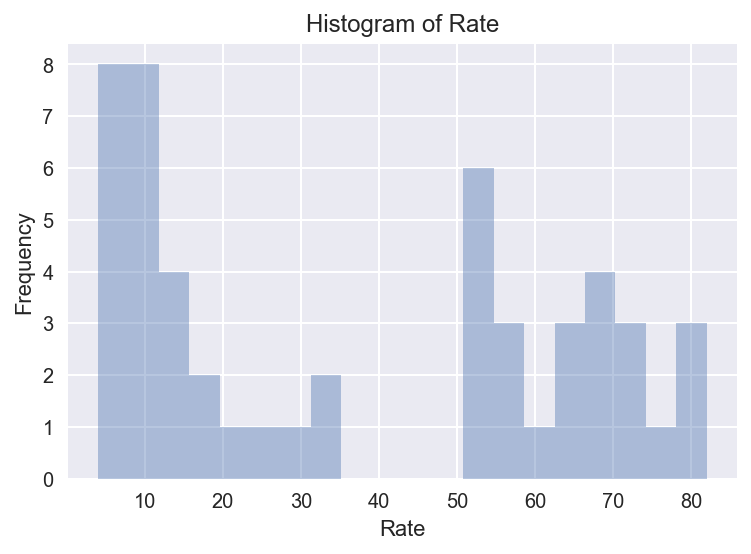

In [15]:
sns.distplot(sat['Rate'], bins=20, kde=False, axlabel='Rate')
sns.plt.title('Histogram of Rate')
sns.plt.ylabel('Frequency')

#Missing data from 35-50

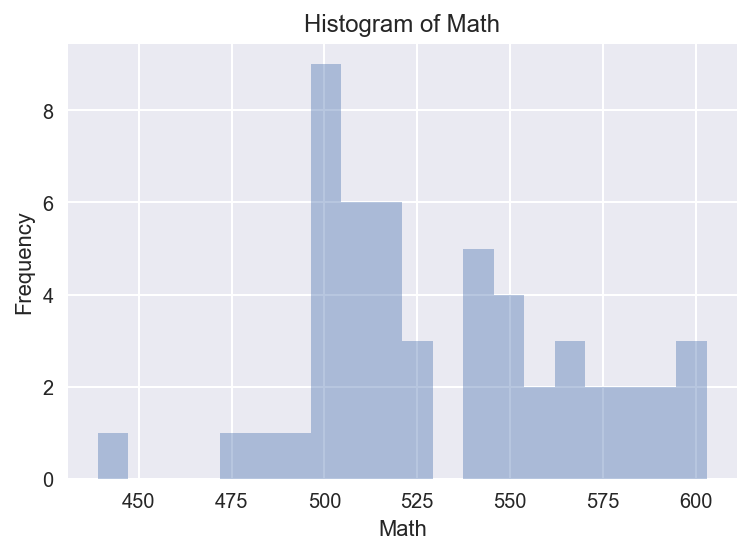

In [16]:
sns.distplot(sat['Math'], bins=20, kde=False, axlabel='Math')
sns.plt.title('Histogram of Math')
sns.plt.ylabel('Frequency')

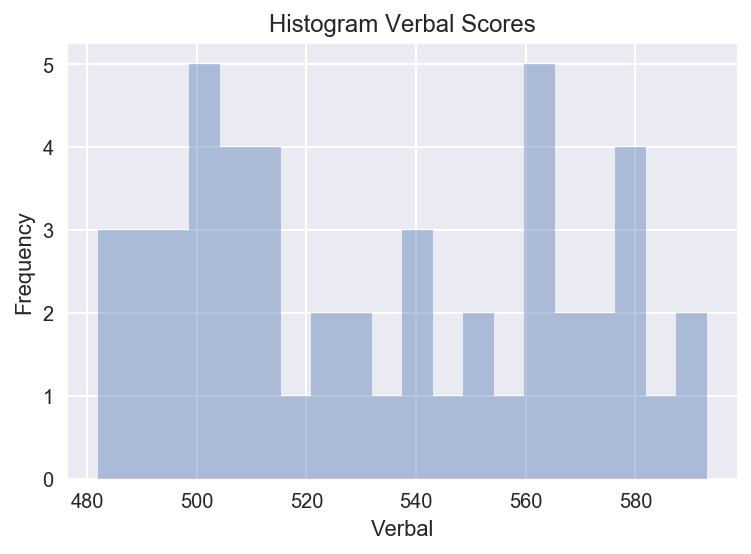

In [17]:
sns.distplot(sat['Verbal'], bins=20, kde=False, axlabel='Verbal')
sns.plt.title('Histogram Verbal Scores')
sns.plt.ylabel('Frequency')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

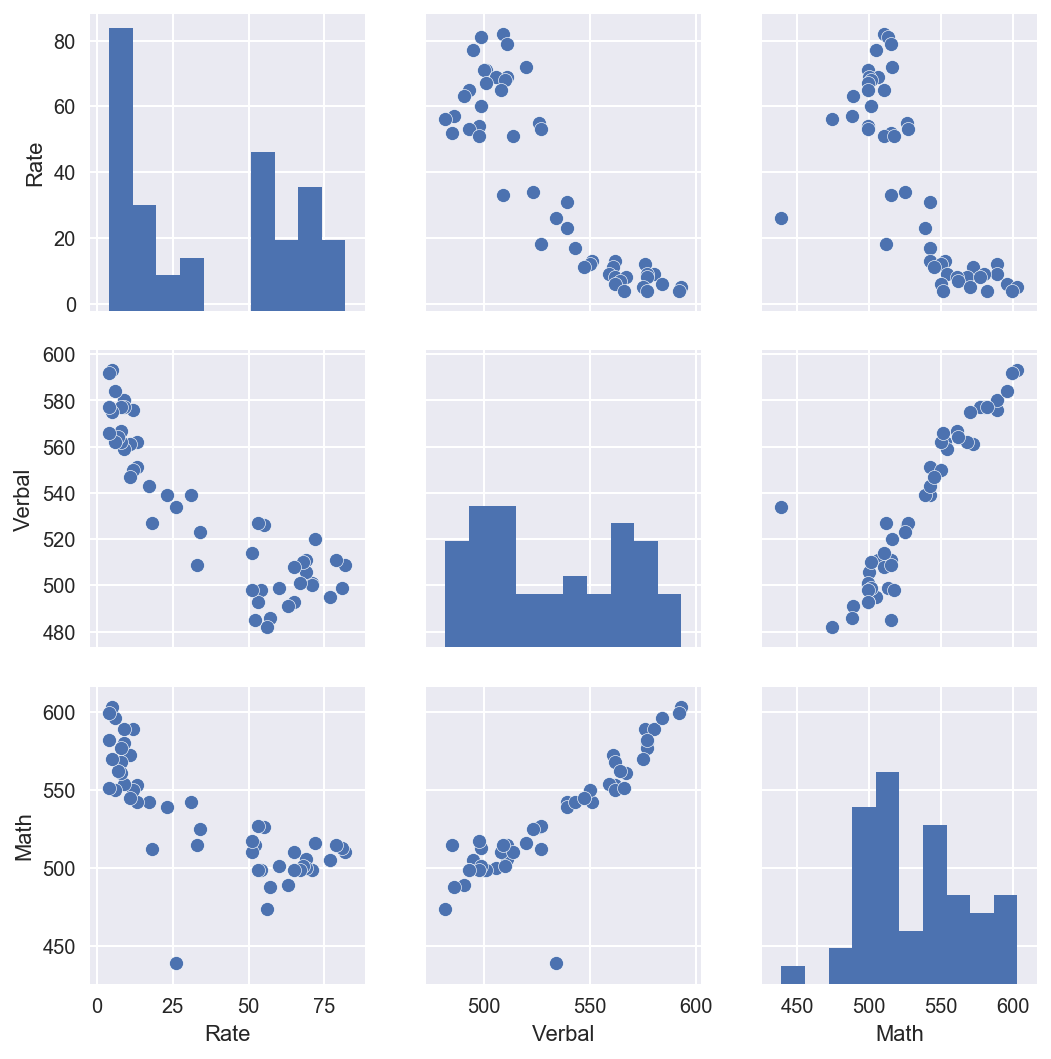

In [18]:
sns.pairplot(sat)

### Comments
Pair plot observations:

-Rate Verbal and Math appear to have bimodal distributions

-There appears to be a linear realtionship between verbal and math scores

-There is one math outlier (Math=439)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

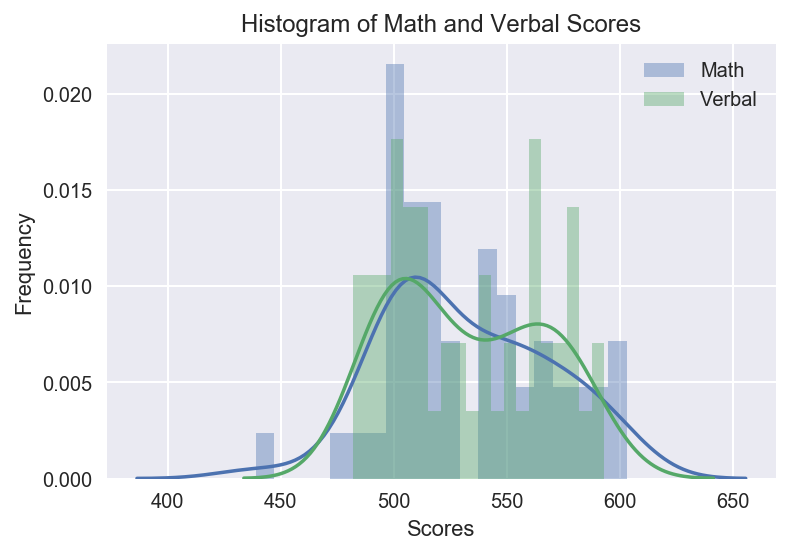

In [19]:
#Histogram of Math and Verbal plotted together
sns.distplot(sat['Math'], bins=20, hist=True,  axlabel='Math', label = 'Math')
sns.distplot(sat['Verbal'], bins=20, hist=True, axlabel='Scores',label = 'Verbal')
sns.plt.title('Histogram of Math and Verbal Scores')
sns.plt.ylabel('Scores')
sns.plt.ylabel('Frequency')
sns.plt.legend(loc='upper right')
#sns.plt.legend('Math','Verbal')
#ax.legend()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

C:\Anaconda\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


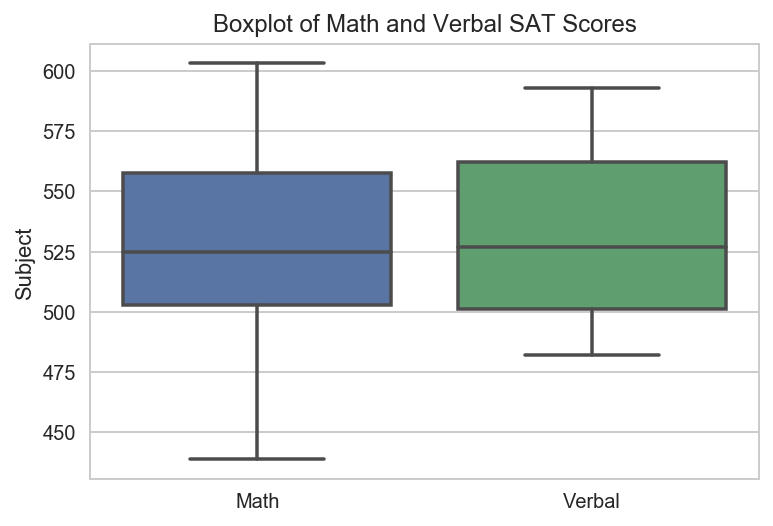

In [19]:
sns.set_style("whitegrid")
ax = sns.boxplot(x=sat.loc[:,['Math','Verbal']],data=sat.loc[:,['Math','Verbal']])
sns.plt.title('Boxplot of Math and Verbal SAT Scores')
sns.plt.ylabel('Scores')
sns.plt.ylabel('Subject')

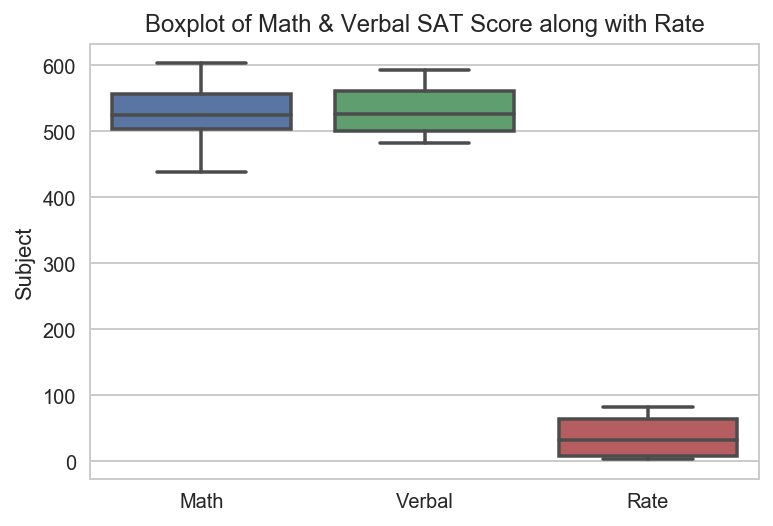

In [20]:
#Boxplot including 'Rate' is not on same scale as 'Math' and 'Verbal'.  As a result the min/max of each boxplot is muted.

ax = sns.boxplot(x=sat.loc[:,['Math','Verbal','Rate']],data=sat.loc[:,['Math','Verbal','Rate']])
sns.plt.title('Boxplot of Math & Verbal SAT Score along with Rate')
sns.plt.ylabel('Scores')
sns.plt.ylabel('Subject')

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [21]:
verb_median = np.median(sat['Verbal'])
verb_mean = np.mean(sat['Verbal'])

state_greater_vmedian = sat[sat.Verbal > verb_median]
state_greater_vmean = sat[sat.Verbal > verb_mean]

#Check length of each state to determine difference
len(state_greater_vmean) #length = 24
len(state_greater_vmedian) #Length = 26

#Using median results in 2 additional states

#Let's try and find out which states
#Attempt 1 using the 'set' function
#Credit: http://stackoverflow.com/questions/1388818/how-can-i-compare-two-lists-in-python-and-return-matches

same = set(state_greater_vmedian.State) & set(state_greater_vmean.State) #Returns states that match. Not quite what we want

#Not quite working.  Need to figure out a way to output the states
#Attempt #2
diff = all(i != j for i, j in zip(state_greater_vmedian.State, state_greater_vmean.State))  



### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [22]:
#Create new column and append to sat dataframe.  New column 'vgm' calculates the difference between Verbal and Math
#Credit Sven Marnach
#http://stackoverflow.com/questions/11677860/subtract-values-in-one-list-from-corresponding-values-in-another-list-python

sat['vgm'] =  [a - b for a, b in zip(sat.Verbal, sat.Math)]
sat.head()

,State,Rate,Verbal,Math,vgm
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [23]:
#sort 'vgm' column from highest to lowest and display first ten
#Credit: Chris Albon 
#https://chrisalbon.com/python/pandas_sorting_rows_dataframe.html
vgm = sat.sort_values(by='vgm', ascending=0)
vgm.head(10)

,State,Rate,Verbal,Math,vgm
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15
45,AR,6,562,550,12
31,TN,13,562,553,9
9,VA,68,510,501,9
32,NM,13,551,542,9
16,DC,56,482,474,8
8,ME,69,506,500,6
41,OK,8,567,561,6


In [24]:
#To get inverse of math-verbal we can sort by the lowest (most negative) values
mgv = sat.sort_values(by='vgm', ascending=1)
mgv.head(10)

,State,Rate,Verbal,Math,vgm
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14
33,IL,12,576,589,-13
44,WI,6,584,596,-12
36,MI,11,561,572,-11
3,NY,77,495,505,-10
47,IA,5,593,603,-10
37,MN,9,580,589,-9
49,ND,4,592,599,-7


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


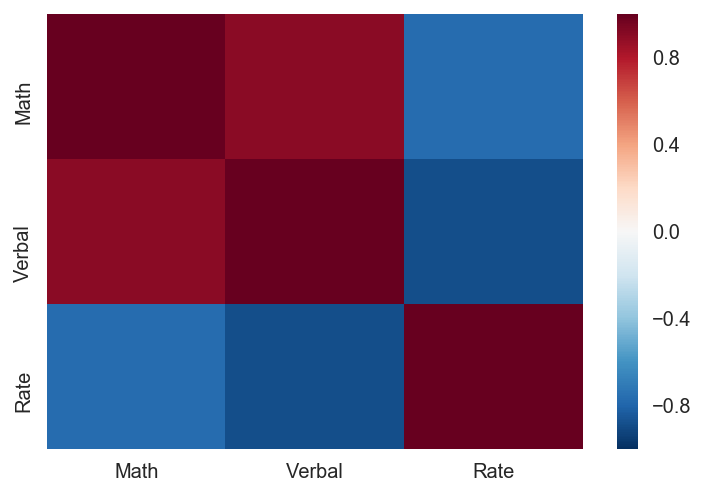

In [25]:
#Calculate and plot correlation matrix
#Credit: http://firsttimeprogrammer.blogspot.com.au/2015/01/how-to-build-correlation-matrix-in.html

cm = sat.loc[:,['Math','Verbal','Rate']]
corr = cm.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Red boxes indicate good correlation between math and verbal

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [26]:
sat.loc[:,['Math','Verbal','Rate']].describe()

,Math,Verbal,Rate
count,51.000000,51.000000,51.000000
mean,531.843137,532.529412,37.000000
std,36.287393,33.360667,27.550681
min,439.000000,482.000000,4.000000
25%,503.000000,501.000000,9.000000
50%,525.000000,527.000000,33.000000
75%,557.500000,562.000000,64.000000
max,603.000000,593.000000,82.000000


The count shouws that we have removed one row 'All'
The min Math value of 439 does not look right and appears to be an outlier. 
Rate suggests this might be the ranking of each state where the lower the Rate the better Math and Verbal scores.  Can't see this in the above plt but is visible on pairplot.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [27]:
#Compute covariance
print 'Covariance of SAT Scores'
print sat.loc[:,['Math','Verbal','Rate']].cov()
print '  '
print 'Correlation of SAT Scores'
print sat.loc[:,['Math','Verbal','Rate']].corr()


Covariance of SAT Scores
               Math       Verbal    Rate
Math    1316.774902  1089.404706 -773.22
Verbal  1089.404706  1112.934118 -816.28
Rate    -773.220000  -816.280000  759.04
  
Correlation of SAT Scores
            Math    Verbal      Rate
Math    1.000000  0.899909 -0.773419
Verbal  0.899909  1.000000 -0.888121
Rate   -0.773419 -0.888121  1.000000


### Comment
Answer to question 1: 

Covariance is dimensionless where correlation is a scaled version of covariance which is standardized between -1 to 1.

Answer to question 2:

In order to convert covariance to correlation one needs to 'normalize'.  Essentially you divide the covariance by something that represents the diversity and scale in both the covariates, and end up with a value that is assured to be between -1 and 1: the correlation.

Credit Nick Sabbe
http://stats.stackexchange.com/questions/18082/how-would-you-explain-the-difference-between-correlation-and-covariance

Answer to Question 3:

Correltaiton matrix is standarded between -1 to 1.  This allows a comparisoin of of variables on the same scale. Since correlation is not standardized it is difficult to compare.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [182]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load csv files and convert to pandas data frame
drug_use_csv = 'C:/Users/Jeff Patra/Documents/DSi/Materials/Project2/drug-use-by-age.csv'
drug = pd.read_csv(drug_use_csv)

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [183]:
#Quicklook at the imported data.  All columns appear to be mix of integers and floats.
drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [184]:
#View column header information.  The '-' could be a problem.
list(drug)

['age',
 'n',
 'alcohol-use',
 'alcohol-frequency',
 'marijuana-use',
 'marijuana-frequency',
 'cocaine-use',
 'cocaine-frequency',
 'crack-use',
 'crack-frequency',
 'heroin-use',
 'heroin-frequency',
 'hallucinogen-use',
 'hallucinogen-frequency',
 'inhalant-use',
 'inhalant-frequency',
 'pain-releiver-use',
 'pain-releiver-frequency',
 'oxycontin-use',
 'oxycontin-frequency',
 'tranquilizer-use',
 'tranquilizer-frequency',
 'stimulant-use',
 'stimulant-frequency',
 'meth-use',
 'meth-frequency',
 'sedative-use',
 'sedative-frequency']

In [185]:
#The '-' in the header could be a problem.  Let's replace them with '_' and shorten header name by abbreviating 'frequency
drug.columns = drug.columns.str.replace('-','_')
drug.columns = drug.columns.str.replace('frequency','freq')
list(drug)

['age',
 'n',
 'alcohol_use',
 'alcohol_freq',
 'marijuana_use',
 'marijuana_freq',
 'cocaine_use',
 'cocaine_freq',
 'crack_use',
 'crack_freq',
 'heroin_use',
 'heroin_freq',
 'hallucinogen_use',
 'hallucinogen_freq',
 'inhalant_use',
 'inhalant_freq',
 'pain_releiver_use',
 'pain_releiver_freq',
 'oxycontin_use',
 'oxycontin_freq',
 'tranquilizer_use',
 'tranquilizer_freq',
 'stimulant_use',
 'stimulant_freq',
 'meth_use',
 'meth_freq',
 'sedative_use',
 'sedative_freq']

In [186]:
#View types in each column
drug.dtypes #Looks like we need to convert to floats

age                    object
n                       int64
alcohol_use           float64
alcohol_freq          float64
marijuana_use         float64
marijuana_freq        float64
cocaine_use           float64
cocaine_freq           object
crack_use             float64
crack_freq             object
heroin_use            float64
heroin_freq            object
hallucinogen_use      float64
hallucinogen_freq     float64
inhalant_use          float64
inhalant_freq          object
pain_releiver_use     float64
pain_releiver_freq    float64
oxycontin_use         float64
oxycontin_freq         object
tranquilizer_use      float64
tranquilizer_freq     float64
stimulant_use         float64
stimulant_freq        float64
meth_use              float64
meth_freq              object
sedative_use          float64
sedative_freq         float64
dtype: object

In [187]:
#Let's look at columns that have type'object'
drug.age.unique()

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22-23',
       '24-25', '26-29', '30-34', '35-49', '50-64', '65+'], dtype=object)

In [188]:
#First let's remove the '+'
drug.age = drug.age.str.replace('+','')
print drug.age

0        12
1        13
2        14
3        15
4        16
5        17
6        18
7        19
8        20
9        21
10    22-23
11    24-25
12    26-29
13    30-34
14    35-49
15    50-64
16       65
Name: age, dtype: object


Now lets turn the 'age' column into a string and remove the '-'.  If the row has a '-' then we will take the average.

In [189]:
#First split age into 2 columns using '-' as a delimiter and place into new dataframe called 'AGE'
drug.age1 = drug.age.str.split('-').str[0]
drug.age2 = drug.age.str.split('-').str[1]

#Convert each column to float
drug.age1 = drug.age1.astype(float)
drug.age2 = drug.age2.astype(float)

#Take average of age1 and age2.  Used np.nanmean to keep original value if nan exists
drug.age = np.nanmean(zip(drug.age1,drug.age2),axis=1)
print drug.age


0     12.0
1     13.0
2     14.0
3     15.0
4     16.0
5     17.0
6     18.0
7     19.0
8     20.0
9     21.0
10    22.5
11    24.5
12    27.5
13    32.0
14    42.0
15    57.0
16    65.0
Name: age, dtype: float64


In [190]:
drug['cocaine_freq'].unique()

array(['5.0', '1.0', '5.5', '4.0', '7.0', '8.0', '6.0', '15.0', '36.0', '-'], dtype=object)

In [191]:
# This '-' is going to cause problems.  
drug.cocaine_freq = drug.cocaine_freq.str.replace('-','0') #Change to '-' to 0 
drug.cocaine_freq = drug.cocaine_freq.astype(float) #Convert column to float

In [192]:
drug['heroin_freq'].unique()

array(['35.5', '-', '2.0', '1.0', '66.5', '64.0', '46.0', '180.0', '45.0',
       '30.0', '57.5', '88.0', '50.0', '66.0', '280.0', '41.0', '120.0'], dtype=object)

In [193]:
drug.heroin_freq = drug.heroin_freq.str.replace('-','0') #Change to '-' to 0 
drug.heroin_freq = drug.heroin_freq.astype(float) #Convert column to float

In [194]:
drug['inhalant_freq'].unique()

array(['19.0', '12.0', '5.0', '5.5', '3.0', '4.0', '2.0', '3.5', '10.0',
       '13.5', '-'], dtype=object)

In [195]:
drug.inhalant_freq = drug.inhalant_freq.str.replace('-','0') #Change to '-' to 0 
drug.inhalant_freq = drug.inhalant_freq.astype(float) #Convert column to float

In [196]:
drug['oxycontin_freq'].unique()

array(['24.5', '41.0', '4.5', '3.0', '4.0', '6.0', '7.0', '7.5', '12.0',
       '13.5', '17.5', '20.0', '46.0', '5.0', '-'], dtype=object)

In [197]:
drug.oxycontin_freq = drug.oxycontin_freq.str.replace('-','0') #Change to '-' to 0 
drug.oxycontin_freq = drug.oxycontin_freq.astype(float) #Convert column to float

In [198]:
drug['crack_freq'].unique()

array(['-', '3.0', '9.5', '1.0', '21.0', '10.0', '2.0', '5.0', '17.0',
       '6.0', '15.0', '48.0', '62.0'], dtype=object)

In [199]:
drug.crack_freq = drug.crack_freq.str.replace('-','0') #Change to '-' to 0 
drug.crack_freq = drug.crack_freq.astype(float) #Convert column to float

In [200]:
drug['meth_freq'].unique()

array(['-', '5.0', '24.0', '10.5', '36.0', '48.0', '12.0', '105.0', '2.0',
       '46.0', '21.0', '30.0', '54.0', '104.0'], dtype=object)

In [201]:
drug.meth_freq = drug.meth_freq.str.replace('-','0') #Change to '-' to 0 
drug.meth_freq = drug.meth_freq.astype(float) #Convert column to float

In [202]:
drug.dtypes #Verify columns converted to floats

age                   float64
n                       int64
alcohol_use           float64
alcohol_freq          float64
marijuana_use         float64
marijuana_freq        float64
cocaine_use           float64
cocaine_freq          float64
crack_use             float64
crack_freq            float64
heroin_use            float64
heroin_freq           float64
hallucinogen_use      float64
hallucinogen_freq     float64
inhalant_use          float64
inhalant_freq         float64
pain_releiver_use     float64
pain_releiver_freq    float64
oxycontin_use         float64
oxycontin_freq        float64
tranquilizer_use      float64
tranquilizer_freq     float64
stimulant_use         float64
stimulant_freq        float64
meth_use              float64
meth_freq             float64
sedative_use          float64
sedative_freq         float64
dtype: object

In [203]:
drug.isnull().sum() #Check for null values.  Zero null

#Now we are ready to analyze the data.

age                   0
n                     0
alcohol_use           0
alcohol_freq          0
marijuana_use         0
marijuana_freq        0
cocaine_use           0
cocaine_freq          0
crack_use             0
crack_freq            0
heroin_use            0
heroin_freq           0
hallucinogen_use      0
hallucinogen_freq     0
inhalant_use          0
inhalant_freq         0
pain_releiver_use     0
pain_releiver_freq    0
oxycontin_use         0
oxycontin_freq        0
tranquilizer_use      0
tranquilizer_freq     0
stimulant_use         0
stimulant_freq        0
meth_use              0
meth_freq             0
sedative_use          0
sedative_freq         0
dtype: int64

In [204]:
drug.describe()

,age,n,alcohol_use,alcohol_freq,marijuana_use,marijuana_freq,cocaine_use,cocaine_freq,crack_use,crack_freq,...,oxycontin_use,oxycontin_freq,tranquilizer_use,tranquilizer_freq,stimulant_use,stimulant_freq,meth_use,meth_freq,sedative_use,sedative_freq
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,25.617647,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.411765,0.294118,12.382353,...,0.935294,13.941176,2.805882,11.735294,1.917647,31.147059,0.382353,31.735294,0.282353,19.382353
std,15.356726,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.014119,0.235772,17.361532,...,0.608216,12.902134,1.753379,11.485205,1.407673,85.973790,0.262762,32.206423,0.138000,24.833527
min,12.000000,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,16.000000,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,2.000000,...,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,20.000000,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,6.000000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,27.500000,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,15.000000,...,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000
max,65.000000,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


In [205]:
#Group dataframe by Use and Frequency
drug_use = drug.iloc[:,[0,1,2,4,6,8,10,12,14,16,18,20,22,26]]
drug_freq = drug.iloc[:,[0,1,3,5,7,9,11,13,15,17,19,21,23,25,27]]


In [206]:
#Sort columns to see top 5 drug use
drug_use.reindex_axis(drug_use.mean().sort_values(ascending=False).index, axis=1)

,n,alcohol_use,age,marijuana_use,pain_releiver_use,hallucinogen_use,tranquilizer_use,cocaine_use,stimulant_use,inhalant_use,oxycontin_use,heroin_use,crack_use,sedative_use
0,2798,3.9,12.0,1.1,2.0,0.2,0.2,0.1,0.2,1.6,0.1,0.1,0.0,0.2
1,2757,8.5,13.0,3.4,2.4,0.6,0.3,0.1,0.3,2.5,0.1,0.0,0.0,0.1
2,2792,18.1,14.0,8.7,3.9,1.6,0.9,0.1,0.8,2.6,0.4,0.1,0.0,0.2
3,2956,29.2,15.0,14.5,5.5,2.1,2.0,0.5,1.5,2.5,0.8,0.2,0.1,0.4
4,3058,40.1,16.0,22.5,6.2,3.4,2.4,1.0,1.8,3.0,1.1,0.1,0.0,0.2
5,3038,49.3,17.0,28.0,8.5,4.8,3.5,2.0,2.8,2.0,1.4,0.1,0.1,0.5
6,2469,58.7,18.0,33.7,9.2,7.0,4.9,3.2,3.0,1.8,1.7,0.4,0.4,0.4
7,2223,64.6,19.0,33.4,9.4,8.6,4.2,4.1,3.3,1.4,1.5,0.5,0.5,0.3
8,2271,69.7,20.0,34.0,10.0,7.4,5.4,4.9,4.0,1.5,1.7,0.9,0.6,0.5
9,2354,83.2,21.0,33.0,9.0,6.3,3.9,4.8,4.1,1.4,1.3,0.6,0.5,0.3


Top 5 Drugs based on Use:
1. alcohol
2. marijuana
3. pain_releiver
4. hallucinogen
5. tranqullizer

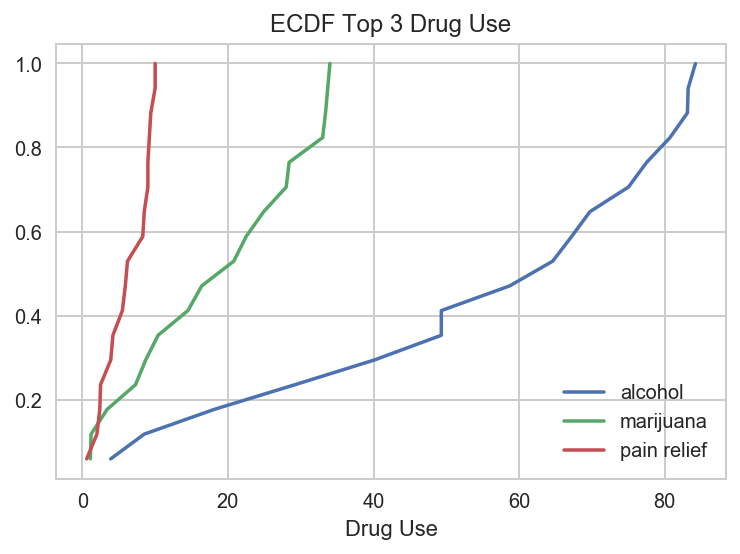

In [207]:
#Let's plot a cumulative distribution function for each to compare

from statsmodels.distributions.empirical_distribution import ECDF

cdf_alcohol_u = ECDF(drug['alcohol_use'])
cdf_weed_u = ECDF(drug['marijuana_use'])
cdf_pain_relief_u = ECDF(drug['pain_releiver_use'])
#cdf_hall_u = ECDF(drug['hallucinogen_use'])
#cdf_tranq_u = ECDF(drug['tranquilizer_use'])

plt.plot(cdf_alcohol_u.x, cdf_alcohol_u.y, label= 'alcohol')
plt.plot(cdf_weed_u.x, cdf_weed_u.y, label='marijuana')
plt.plot(cdf_pain_relief_u.x, cdf_pain_relief_u.y, label='pain relief')
#plt.plot(cdf_hall_u.x, cdf_hall_u.y, label='hallucinogen')
#plt.plot(cdf_tranq_u.x, cdf_tranq_u.y, label='tranquilizer')
plt.title('ECDF Top 3 Drug Use')
plt.legend(loc='bottom right')
plt.xlabel('Drug Use')
plt.show()

### Comment
Alcohol dominates usage where marijuana peaks around 35 and pain relief drugs are around 10.

In [208]:
#Sort columns to see top 5 drug frequency
drug_freq.reindex_axis(drug_freq.mean().sort_values(ascending=False).index, axis=1)

,n,heroin_freq,marijuana_freq,alcohol_freq,meth_freq,stimulant_freq,age,sedative_freq,pain_releiver_freq,oxycontin_freq,crack_freq,tranquilizer_freq,hallucinogen_freq,cocaine_freq,inhalant_freq
0,2798,35.5,4.0,3.0,0.0,2.0,12.0,13.0,36.0,24.5,0.0,52.0,52.0,5.0,19.0
1,2757,0.0,15.0,6.0,5.0,4.0,13.0,19.0,14.0,41.0,3.0,25.5,6.0,1.0,12.0
2,2792,2.0,24.0,5.0,24.0,12.0,14.0,16.5,12.0,4.5,0.0,5.0,3.0,5.5,5.0
3,2956,1.0,25.0,6.0,10.5,6.0,15.0,30.0,10.0,3.0,9.5,4.5,4.0,4.0,5.5
4,3058,66.5,30.0,10.0,36.0,9.5,16.0,3.0,7.0,4.0,1.0,11.0,3.0,7.0,3.0
5,3038,64.0,36.0,13.0,48.0,9.0,17.0,6.5,9.0,6.0,21.0,7.0,3.0,5.0,4.0
6,2469,46.0,52.0,24.0,12.0,8.0,18.0,10.0,12.0,7.0,10.0,12.0,4.0,5.0,4.0
7,2223,180.0,60.0,36.0,105.0,6.0,19.0,6.0,12.0,7.5,2.0,4.5,3.0,5.5,3.0
8,2271,45.0,60.0,48.0,12.0,12.0,20.0,4.0,10.0,12.0,5.0,10.0,2.0,8.0,4.0
9,2354,30.0,52.0,52.0,2.0,10.0,21.0,9.0,15.0,13.5,17.0,7.0,4.0,5.0,2.0


### Comment
Top 3 drugs based on Frequency
1. heroin
2. marijuana
3. alcohol

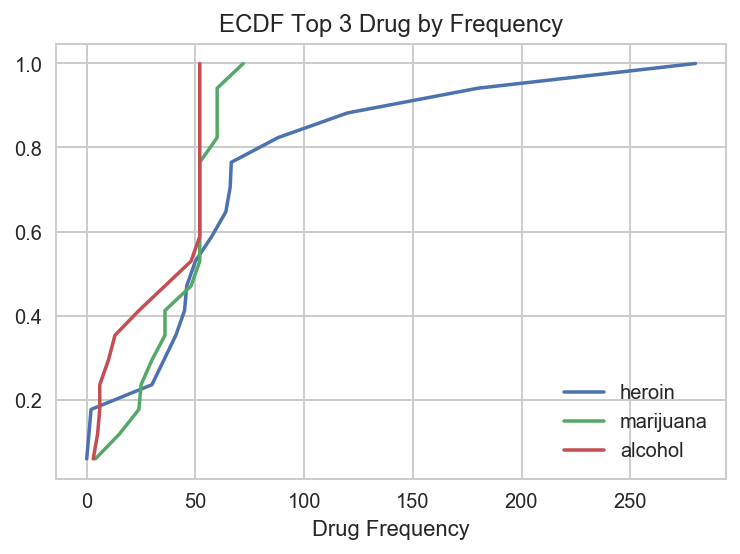

In [209]:
#ECDF of top 3 drugs by frequency
cdf_heroin_f = ECDF(drug['heroin_freq'])
cdf_weed_f = ECDF(drug['marijuana_freq'])
cdf_alcohol_f = ECDF(drug['alcohol_freq'])


plt.plot(cdf_heroin_f.x, cdf_heroin_f.y, label= 'heroin')
plt.plot(cdf_weed_f.x, cdf_weed_f.y, label='marijuana')
plt.plot(cdf_alcohol_f.x, cdf_alcohol_f.y, label='alcohol')
#plt.plot(cdf_hall_u.x, cdf_hall_u.y, label='hallucinogen')
#plt.plot(cdf_tranq_u.x, cdf_tranq_u.y, label='tranquilizer')
plt.title('ECDF Top 3 Drug by Frequency')
plt.legend(loc='bottom right')
plt.xlabel('Drug Frequency')
plt.show()

Plot indicates heroin is highly addictive with a frequency of over 250 where marijuana and alcohol peak around 50.

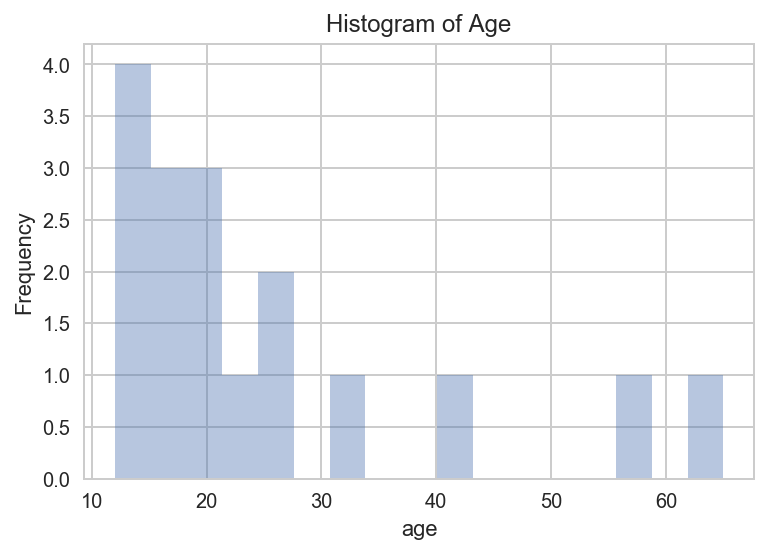

In [210]:
sns.distplot(drug['age'], bins=17, kde=False, axlabel='age')
sns.plt.title('Histogram of Age')
sns.plt.ylabel('Frequency')

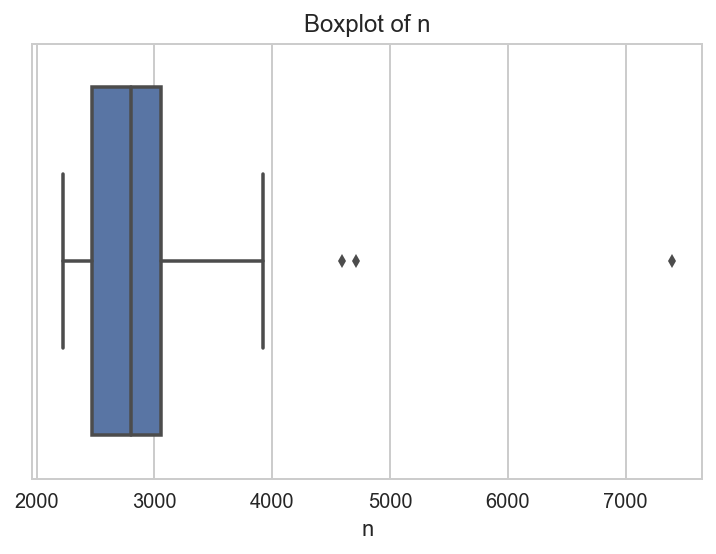

In [211]:
sns.set_style("whitegrid")

ax = sns.boxplot(x=drug.n)
sns.plt.title('Boxplot of n')
#sns.plt.ylabel('Scores')
#sns.plt.ylabel('Subject')


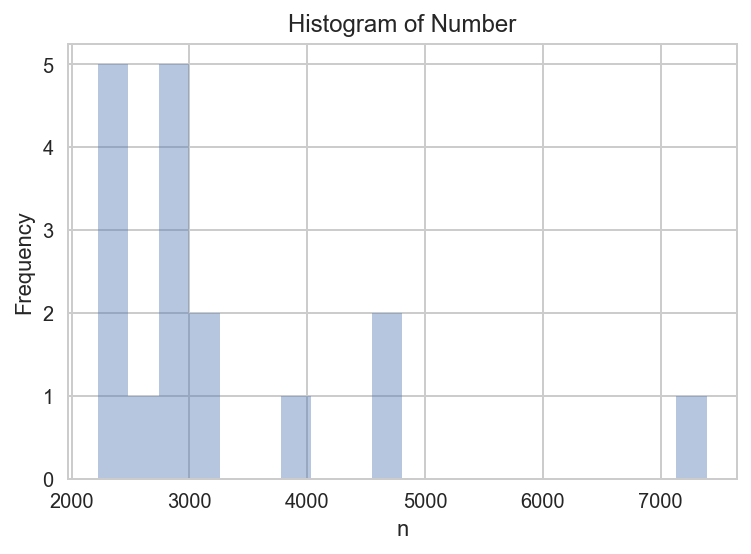

In [212]:
sns.distplot(drug['n'], bins=20, kde=False, axlabel='n')
sns.plt.title('Histogram of Number')
sns.plt.ylabel('Frequency')
#Looks like there is a possible outler where n > 7000.  At closer inspection this is the age category that was between 35-49.
#I used the average age but this is quite a large gap within this data set.

In [213]:
drug_use = drug.iloc[:,[0,1,2,4,6,8,10,12,14,16,18,20,22,26]]
drug_freq = drug.iloc[:,[0,1,3,5,7,9,11,13,15,17,19,21,23,25,27]]
drug_freq.head()

,age,n,alcohol_freq,marijuana_freq,cocaine_freq,crack_freq,heroin_freq,hallucinogen_freq,inhalant_freq,pain_releiver_freq,oxycontin_freq,tranquilizer_freq,stimulant_freq,meth_freq,sedative_freq
0,12.0,2798,3.0,4.0,5.0,0.0,35.5,52.0,19.0,36.0,24.5,52.0,2.0,0.0,13.0
1,13.0,2757,6.0,15.0,1.0,3.0,0.0,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
2,14.0,2792,5.0,24.0,5.5,0.0,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
3,15.0,2956,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
4,16.0,3058,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0


In [214]:
#Lets look at top 5 drug use and top 5 drug frequency


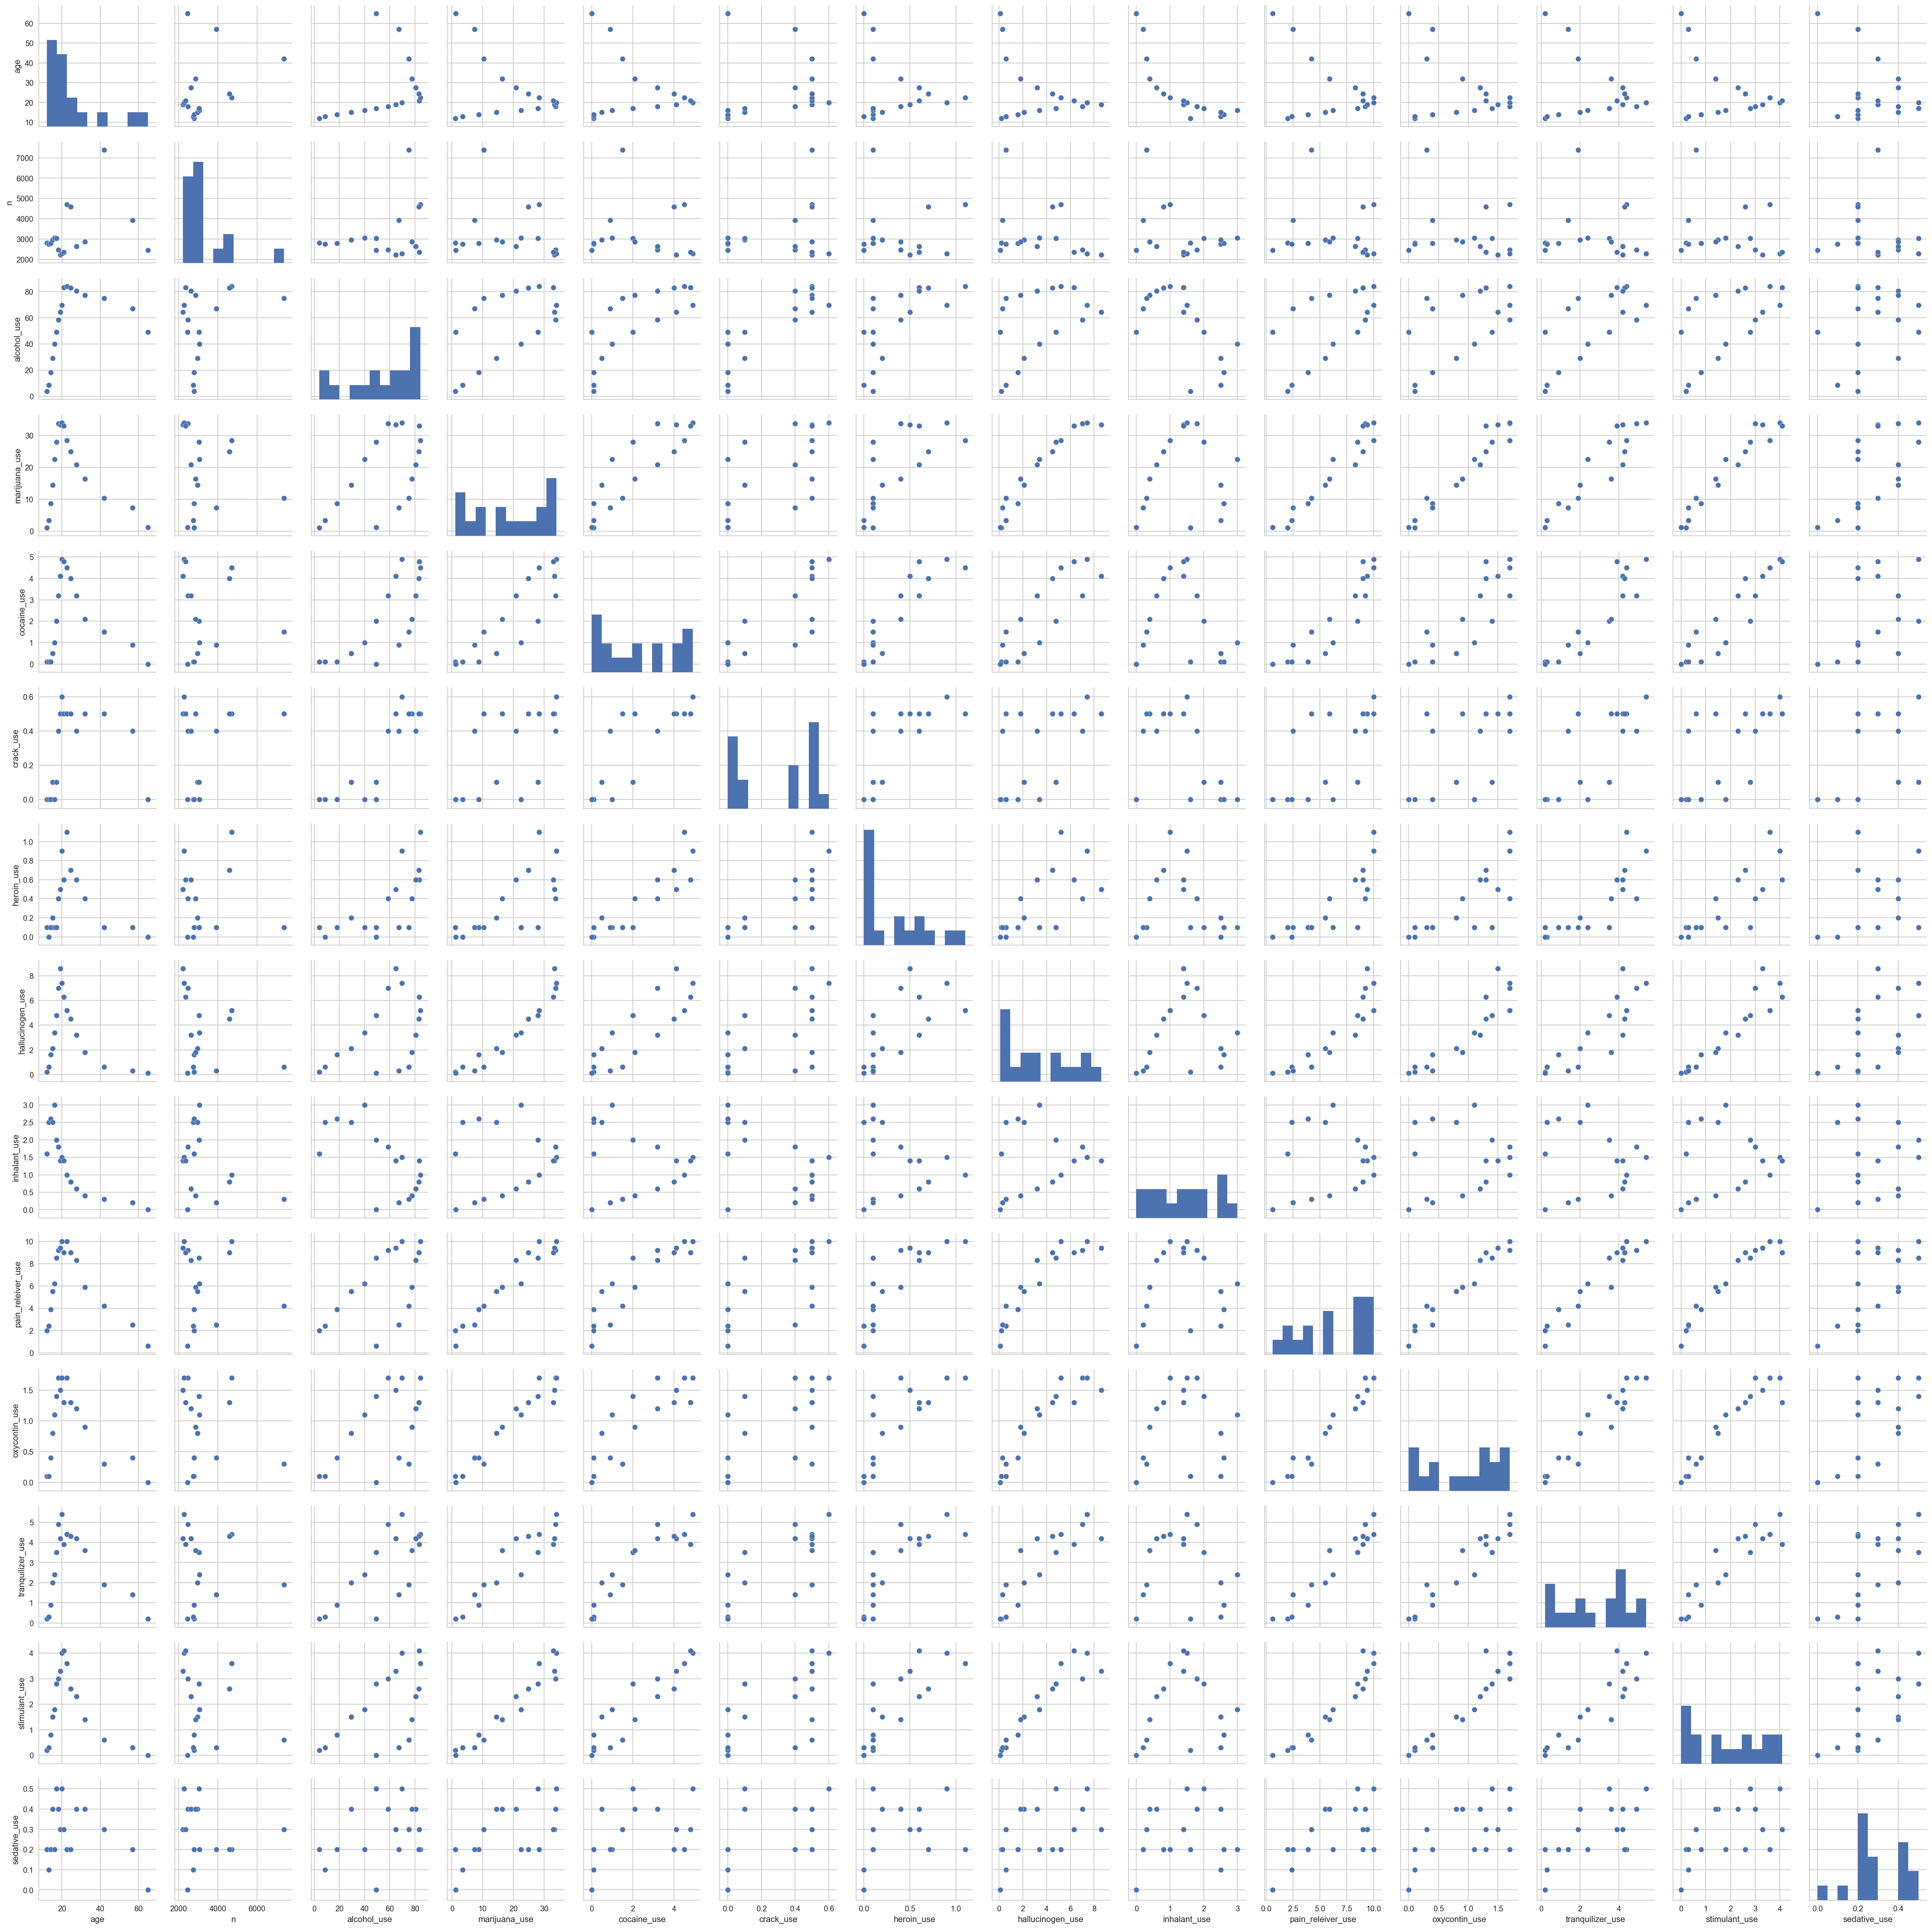

In [586]:
#Wanted to display the data to see if any obvious relationships
sns.pairplot(drug_use)

### Comment
There's a lot of information on the above and it tool a long time to compile. Visually, there appears to be a correlation between marijuana and other drugs.  Let's plot marijuana versus other drugs

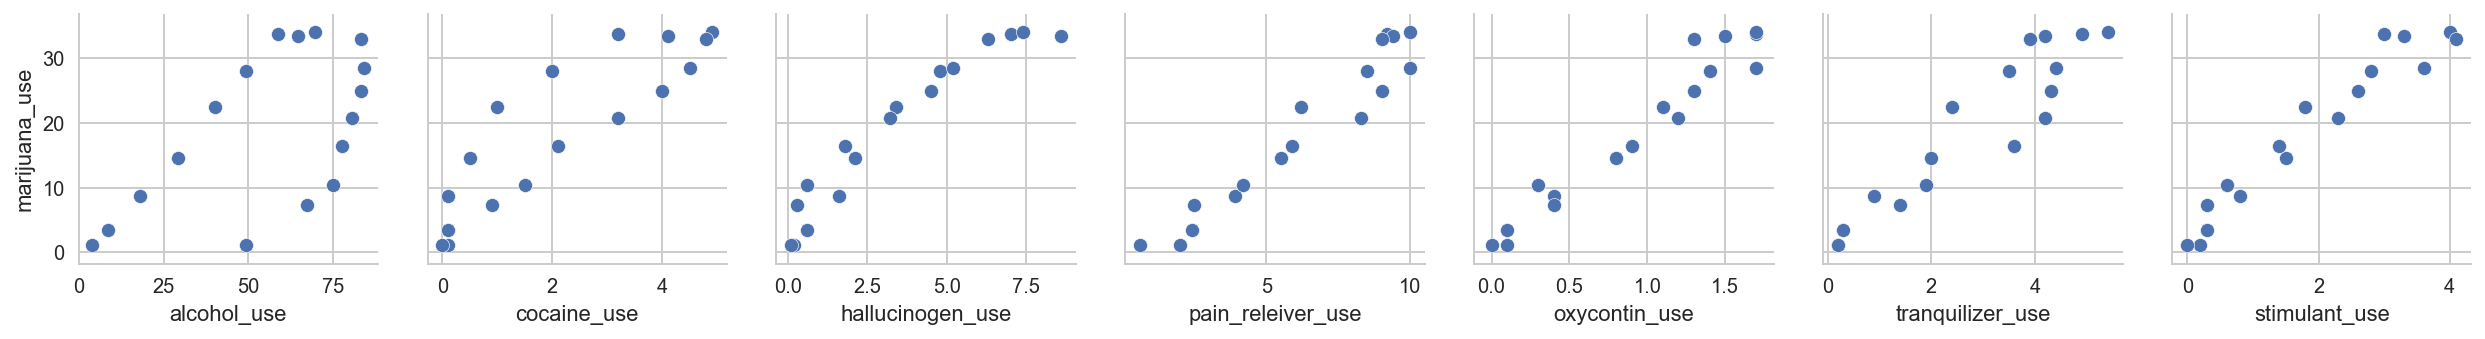

In [215]:
#First plot show the drugs with good to strong correlations
sns.pairplot(data=drug_use,
                  x_vars=['alcohol_use', 'cocaine_use','hallucinogen_use', 'pain_releiver_use', 'oxycontin_use','tranquilizer_use', 'stimulant_use'],y_vars=['marijuana_use'])

In [216]:
print drug_use.loc[:,['marijuana_use','alcohol_use', 'cocaine_use','hallucinogen_use', 'pain_releiver_use', 'oxycontin_use','tranquilizer_use', 'stimulant_use']].corr()
 

                   marijuana_use  alcohol_use  cocaine_use  hallucinogen_use  \
marijuana_use           1.000000     0.594165     0.883789          0.959353   
alcohol_use             0.594165     1.000000     0.773458          0.463702   
cocaine_use             0.883789     0.773458     1.000000          0.855668   
hallucinogen_use        0.959353     0.463702     0.855668          1.000000   
pain_releiver_use       0.966226     0.617523     0.906638          0.909333   
oxycontin_use           0.971733     0.589219     0.865626          0.916777   
tranquilizer_use        0.935199     0.735785     0.920430          0.862900   
stimulant_use           0.968096     0.582241     0.923954          0.940008   

                   pain_releiver_use  oxycontin_use  tranquilizer_use  \
marijuana_use               0.966226       0.971733          0.935199   
alcohol_use                 0.617523       0.589219          0.735785   
cocaine_use                 0.906638       0.865626         

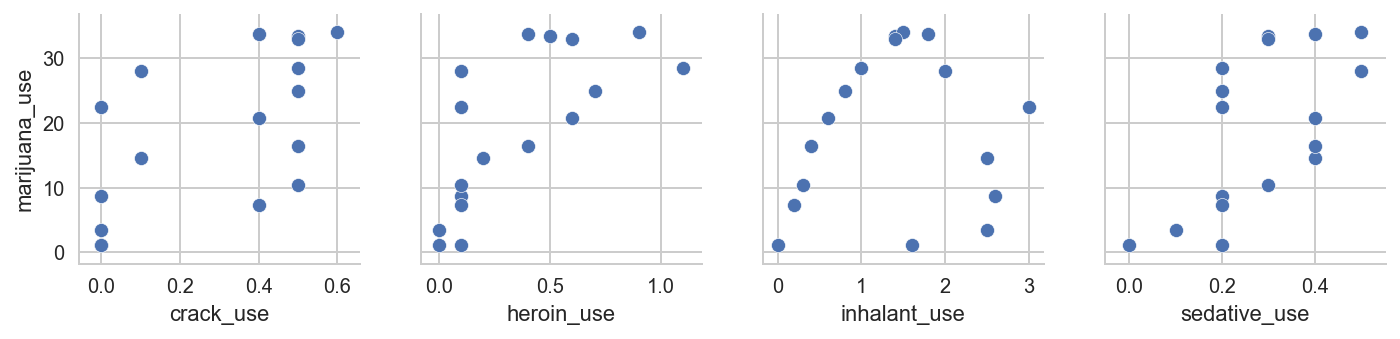

In [217]:
# Plot below show drugs with poor correlations
sns.pairplot(data=drug_use,
                  x_vars=['crack_use', 'heroin_use','inhalant_use','sedative_use'],y_vars=['marijuana_use'])


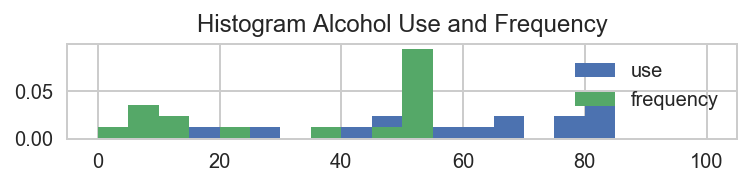

In [218]:
#I wanted to have a look at the distribution of alcohol use and alacohol frequency to see if there is any connection.
#Plot doesn't show anything signifigant

#Credit: Yann
#http://stackoverflow.com/questions/9497524/displaying-3-histograms-on-1-axis-in-a-legible-way-matplotlib

common_params = dict(bins=20, 
                     range=(0, 100), 
                     normed=True)

plt.subplots_adjust(hspace=.8)
plt.subplot(311)
plt.title('Histogram Alcohol Use and Frequency')
plt.hist(drug.alcohol_use, label='use', **common_params)
plt.hist(drug.alcohol_freq, label='frequency', **common_params)
plt.legend(loc='upper right')

Not really telling us much

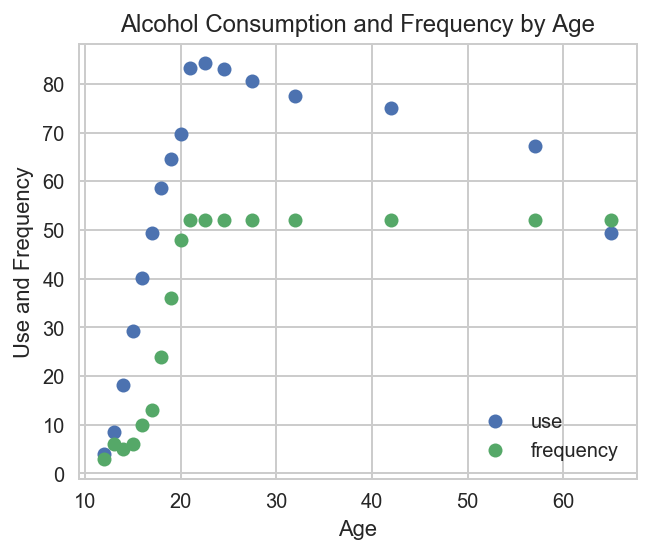

In [219]:
plt.figure(figsize=(5,4))
plt.plot(drug['age'], drug['alcohol_use'],"o", label='use')
plt.plot(drug['age'], drug['alcohol_freq'], "o", label='frequency')
plt.title('Alcohol Consumption and Frequency by Age')
plt.xlabel('Age')
plt.ylabel('Use and Frequency')
plt.legend(loc='lower right')
plt.show()


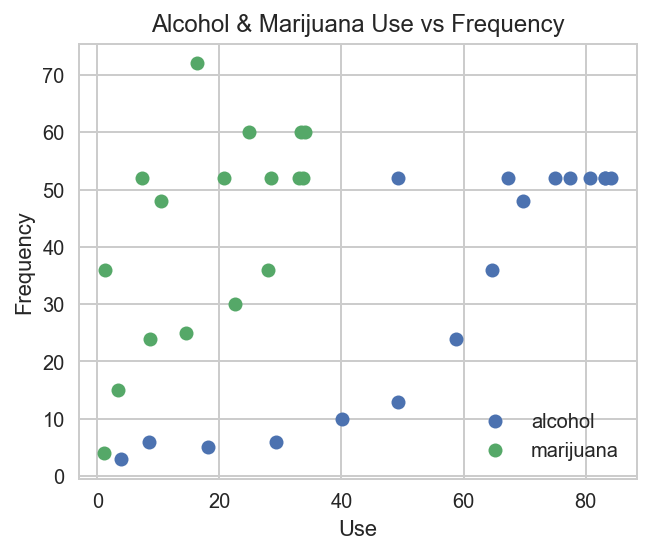

In [220]:
plt.figure(figsize=(5,4))
plt.plot(drug['alcohol_use'], drug['alcohol_freq'],"o", label='alcohol')
plt.plot(drug['marijuana_use'], drug['marijuana_freq'], "o", label='marijuana')
plt.title('Alcohol & Marijuana Use vs Frequency')
plt.xlabel('Use')
plt.ylabel('Frequency')
plt.legend(loc='lower right')
plt.show()

In [221]:
drug_use.describe()

,age,n,alcohol_use,marijuana_use,cocaine_use,crack_use,heroin_use,hallucinogen_use,inhalant_use,pain_releiver_use,oxycontin_use,tranquilizer_use,stimulant_use,sedative_use
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,25.617647,3251.058824,55.429412,18.923529,2.176471,0.294118,0.352941,3.394118,1.388235,6.270588,0.935294,2.805882,1.917647,0.282353
std,15.356726,1297.890426,26.878866,11.959752,1.816772,0.235772,0.333762,2.792506,0.927283,3.166379,0.608216,1.753379,1.407673,0.138000
min,12.000000,2223.000000,3.900000,1.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.600000,0.000000,0.200000,0.000000,0.000000
25%,16.000000,2469.000000,40.100000,8.700000,0.500000,0.000000,0.100000,0.600000,0.600000,3.900000,0.400000,1.400000,0.600000,0.200000
50%,20.000000,2798.000000,64.600000,20.800000,2.000000,0.400000,0.200000,3.200000,1.400000,6.200000,1.100000,3.500000,1.800000,0.300000
75%,27.500000,3058.000000,77.500000,28.400000,4.000000,0.500000,0.600000,5.200000,2.000000,9.000000,1.400000,4.200000,3.000000,0.400000
max,65.000000,7391.000000,84.200000,34.000000,4.900000,0.600000,1.100000,8.600000,3.000000,10.000000,1.700000,5.400000,4.100000,0.500000


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

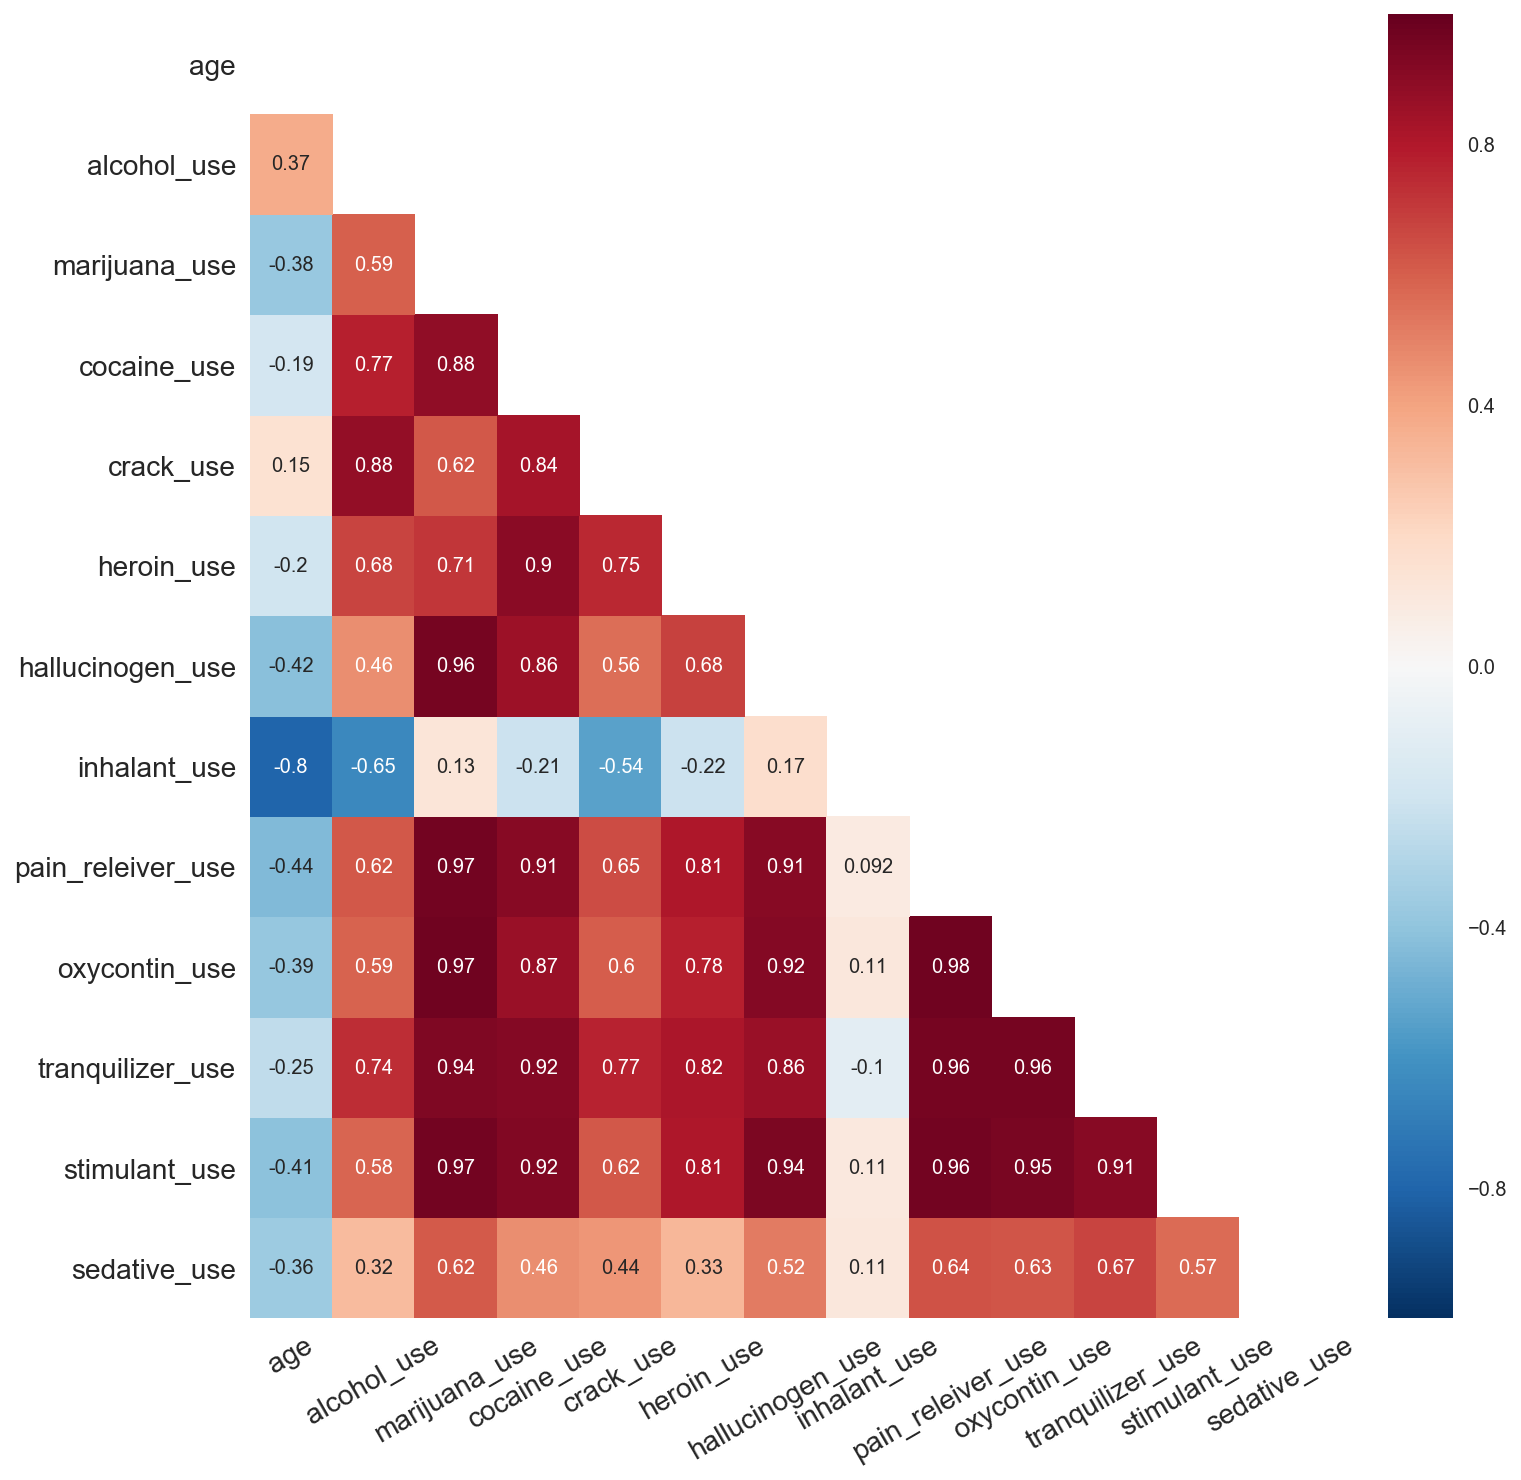

In [222]:
#Correlation heat map

subset_drug_use = drug_use.iloc[:,[0, 2,3,4,5,6,7,8,9,10,11,12,13]]

def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(12,12))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()
    
correlation_heat_map(subset_drug_use)

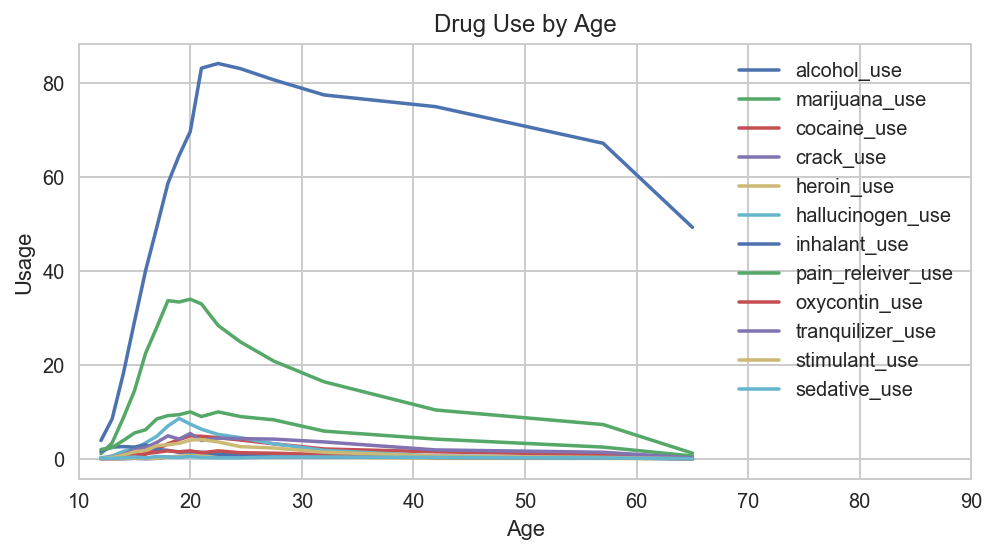

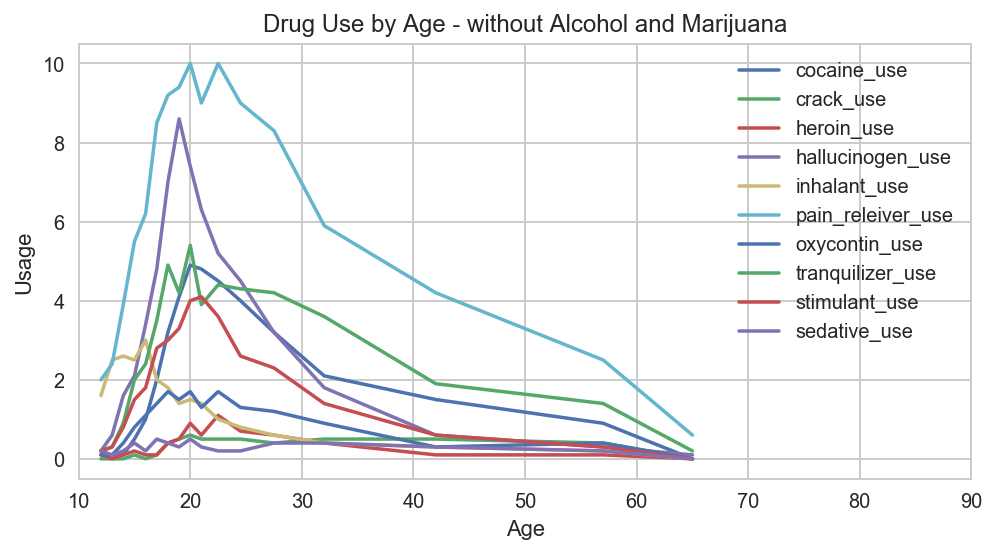

In [223]:
#1. Is there a relationship between drug use with age? 
#Answer: yes for drug use.

#2. If yes, at what age is drug use highest in usage?
# Highest use between 17-23 years. Signifigant drop off after 23 years of age.

#Credit for loop plot to Bahrom:
#http://stackoverflow.com/questions/38152686/iterating-over-columns-with-for-loops-in-pandas-dataframe

plt.figure(figsize=(8,4))

for colname, col in subset_drug_use.iteritems():
    if colname != 'age':
    #if colname != 'age' and colname !='alcohol_use' and colname !='marijuana_use':
        plt.plot(subset_drug_use['age'], subset_drug_use[colname], label=colname)

plt.title('Drug Use by Age')
plt.xlabel('Age')
plt.ylabel('Usage')
plt.legend(loc='upper right')
plt.xlim(10, 90)
plt.show()

#Same plot as above without 'alcohol' and 'marijuana'
plt.figure(figsize=(8,4))
for colname, col in subset_drug_use.iteritems():
    #if colname != 'age':
    if colname != 'age' and colname !='alcohol_use' and colname !='marijuana_use':
        plt.plot(subset_drug_use['age'], subset_drug_use[colname], label=colname)

plt.title('Drug Use by Age - without Alcohol and Marijuana')
plt.xlabel('Age')
plt.ylabel('Usage')
plt.legend(loc='upper right')
plt.xlim(10, 90)
plt.show()

** Question and deliverables**


...

## Summary of Key Findings
Hypothesis

Is there a relationship between drug use with age? If yes, at what age is drug use highest in usage?

Conclusion 

Yes there is a relationship between drug use and age
For all drugs the most 'experimental age was between 17-23 years.  Signifigant drop off after 23 years of age.

Other Key Findings:

Alcohol and Marijuana are the most used drugs

Top three drugs used
    1. Alcohol
    2. Marijuana
    3. Pain Relief
    Alcohol use was double Marijuana.  Marijuana use was double pain relief 
    
Top Three drug frequency
    1. Heroin
    2. Marijuana
    3. Alcohol

ECDF indicates heroin is highly addictive and peaked around 250 times.  The next highest was Marijuana which peaked around 75.

For all drugs the most 'experimental age was between 17-23 years.  Signifigant drop off after 23 years of age.


There is a strong correlation (over 93%) between marijuana use and use of the following drugs:
    Hallucinogens
    pain relief
    oxycontin
    tranquilizers
    stimulants
    
Did not find any signifigant relationship between drug use and frequency.  Although there appears to be some outliers in the heroin frequency data.  Not sure if it is real or not.  Also for the age category 35-49 was quite large with a high n of 7391.  I took the average age within this bracket so may have potentially skewed the data.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [20]:
#1. View summary stats of Rate column in SAT
sat.Rate.describe()

count    51.000000
mean     37.000000
std      27.550681
min       4.000000
25%       9.000000
50%      33.000000
75%      64.000000
max      82.000000
Name: Rate, dtype: float64

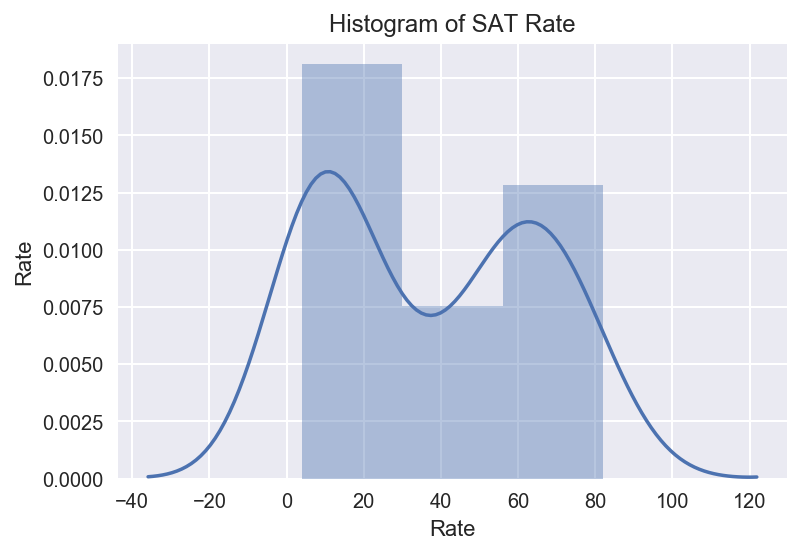

In [21]:
#2.  Outliers
# Numerically outliers are those values which fall below the 25th percentile and above the 75th percentile

#Let's see if we can visulation any outliers with histogram and boxplot.
#Histogram plot
sns.distplot(sat.Rate)
sns.plt.title('Histogram of SAT Rate')
sns.plt.ylabel('Frequency')
sns.plt.ylabel('Rate')

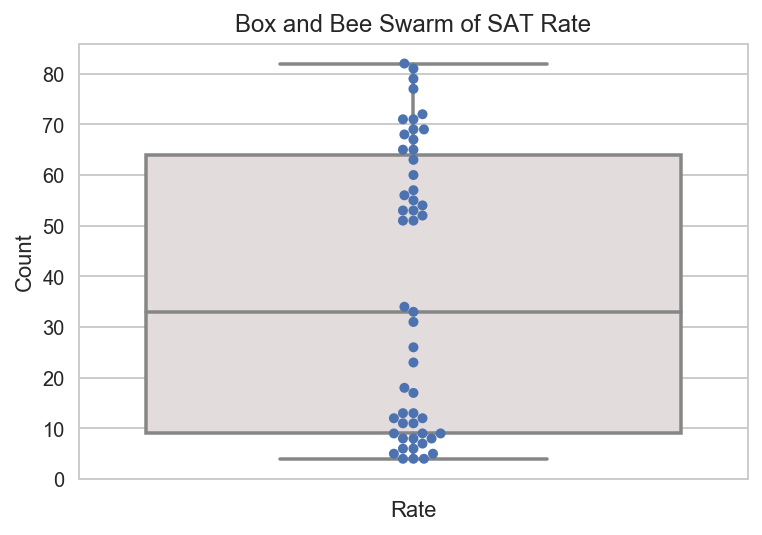

In [22]:
sns.set_style("whitegrid")
ax = sns.swarmplot(x=sat.Rate, orient='v')
ax = sns.boxplot(x=sat.Rate, orient='v', color='pink',saturation=0.1)

sns.plt.title('Box and Bee Swarm of SAT Rate')
sns.plt.xlabel('Rate')
sns.plt.ylabel('Count')

#Combination of swarm and boxplot.  Blue dots inside box represent values inside interquartile range

In [23]:
#This histogram would suggest one of two things:
#1. Distribution is bi model
#2. Distribution does not have enough data points between 30-55
#
#THe beeswarm boxplot suggests that #2 is more likely since there is no data
#in the middle of the data set.


In [158]:
#.Print outliers

#Define 25th and 75th percentile
iqr_25 = np.percentile(sat.Rate,25)
iqr_75 = np.percentile(sat.Rate,75)

#Create list of outliers
outliers=[]
for r in sat.Rate:
    if r < iqr_25 or r >iqr_75:
        outliers.append(r)
print 'outliers'
print outliers

#Create list of rate without outliers
clean_Rate=[]
for r in sat.Rate:
    if r not in outliers:
        clean_Rate.append(r)
print 'clean_Rate'
print clean_Rate


outliers
[82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4]
clean_Rate
[63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9]


Calculated mean of cleaned Rate: 32.8148148148
Calculated mean of Rate: 37.0

Calculated median of cleaned Rate: 31.0
Calculated median of Rate: 33.0

Calculated standard deviation of cleaned Rate: 19.7015454123
Calculated standard deviation of Rate: 27.2792386761


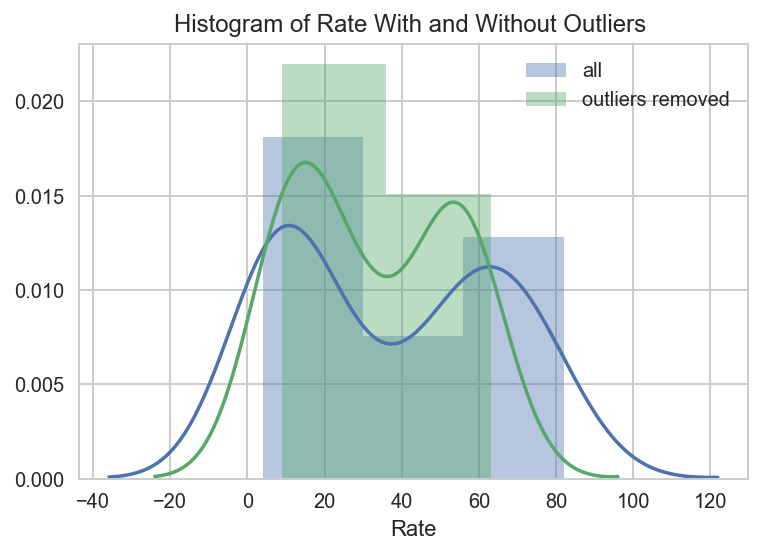

In [151]:
#Compare the mean, median, and standard deviation of the "cleaned" data without
#outliers to the original. What is different about them and why?

#Calculate mean
print 'Calculated mean of cleaned Rate: %s' %np.mean(clean_Rate)
print 'Calculated mean of Rate: %s' %np.mean(sat.Rate)
print ''
#Calculate median
print 'Calculated median of cleaned Rate: %s' %np.median(clean_Rate)
print 'Calculated median of Rate: %s' %np.median(sat.Rate)
print ''
print 'Calculated standard deviation of cleaned Rate: %s' %np.std(clean_Rate)
print 'Calculated standard deviation of Rate: %s' %np.std(sat.Rate)

sat.Rate.describe()

#By removing outliers the main impact was the lowered standard deviation. 
#This makes sense the values removed were outside the interquartile range


#sns.set_style("whitegrid")
sns.distplot(sat.Rate, hist=True, label='all')
sns.distplot(clean_Rate, hist=True, label='outliers removed')
sns.plt.title('Histogram of Rate With and Without Outliers ')
sns.plt.legend(loc='upper right')

Removal of outliers has impacted standard deviaiton the most because all the data points now fall within the interquartile range.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [57]:
sat_vm = sat.iloc[:,[2,3]] #Create seperate dataframe for just verbal and math

print 'Spearman Correlation of Verbal and Math'
print sat_vm.corr(method='spearman') 
print''
print 'Pearson Correlation of Verbal and Math'
print sat_vm.corr(method='pearson')

#sat.head()

Spearman Correlation of Verbal and Math
          Verbal      Math
Verbal  1.000000  0.909413
Math    0.909413  1.000000

Pearson Correlation of Verbal and Math
          Verbal      Math
Verbal  1.000000  0.899909
Math    0.899909  1.000000


## Comment
Spearman and Pearson Correlations are extremely similar.  When rounding the result is the same.

Spearman correlation is based on the ranked values for each variable.  In other words it is a monotonic relatipnship between variables but not necessarily constant.

Pearson evaluates the linear relationship between variables


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [102]:
from scipy import stats

#First define percentiles.
ptiles = [2.5, 25, 50, 75, 97.5]
ptiles = np.array(percentiles)


#Convert rate to percentiles
ptiles_Rate = np.percentile(sat.Rate, ptiles )
print ptiles_Rate

sat.State #Find Rate of California 
#California is index 23
print sat.iloc[23] #Find Rate of California which is index 23.

CA_ptile = stats.percentileofscore(ptiles_Rate, sat.Rate.iloc[23])

print 'California is the %sth percentile in Rate' %CA_ptile


[  4.    9.   33.   64.   80.5]
State      CA
Rate       51
Verbal    498
Math      517
Name: 23, dtype: object
California is the 60.0th percentile in Rate


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

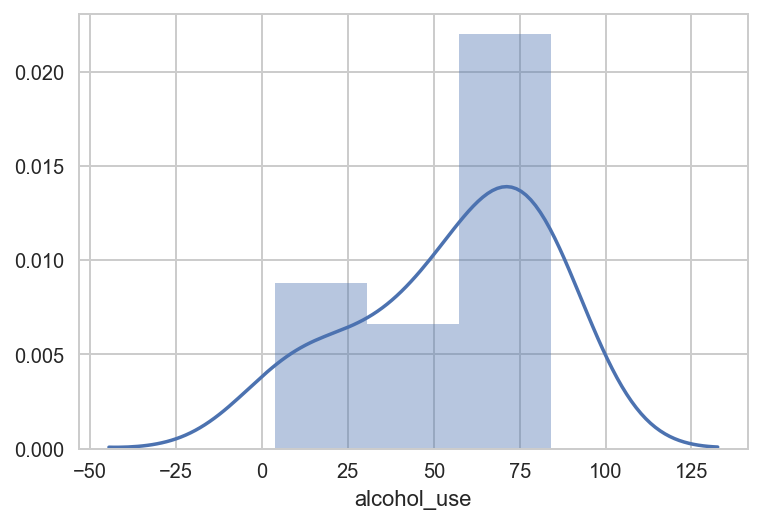

In [136]:
#1. Percentile scoring helps identify numerically where the outliers are.  We can then evaluate the outliers to detmine if they are real data points or infact anomalies
#2. I have chosen the variable 'alcohol_use'

sns.distplot(drug.alcohol_use, hist=True)
#sns.plt.title('Histogram of alcohol use')


the alcohol use percentiles
[  5.74  40.1   64.6   77.5   83.8 ]


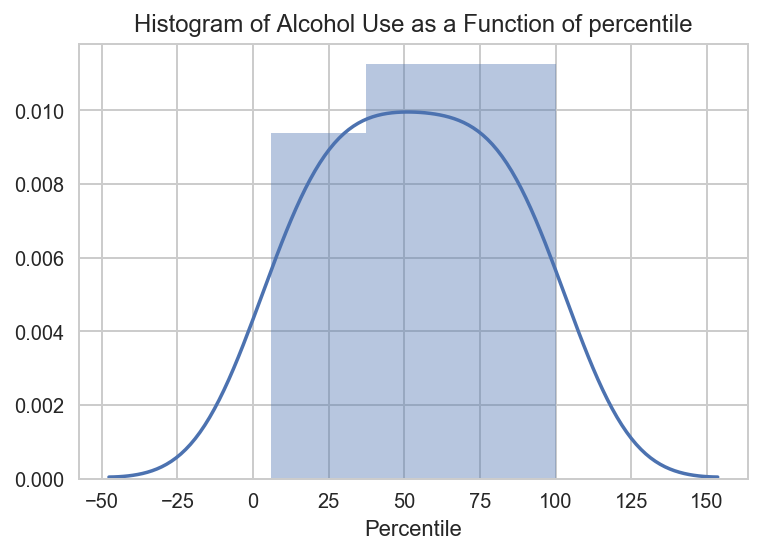

In [143]:
#3. plot age converted to percentile
ptiles = [2.5, 25, 50, 75, 97.5]
ptiles = np.array(percentiles)

ptiles_alcohol = np.percentile(drug.alcohol_use, ptiles )
print 'the alcohol use percentiles'
print ptiles_alcohol
#print ptiles_age #Calculated percentile boundaries for age

#Calculate percentile for each value in alcohol use
#Credit reptilicus http://stackoverflow.com/questions/12414043/map-each-list-value-to-its-corresponding-percentile
drug.alcohol_use_ptile = [stats.percentileofscore(drug.alcohol_use, i) for i in drug.alcohol_use]

sns.distplot(drug.alcohol_use_ptile, hist=True)
sns.plt.title('Histogram of Alcohol Use as a Function of percentile')
sns.plt.xlabel('Percentile')

#4. By converting age to percentile scoring it converts values between 0 and 100 creating perfect distribution.


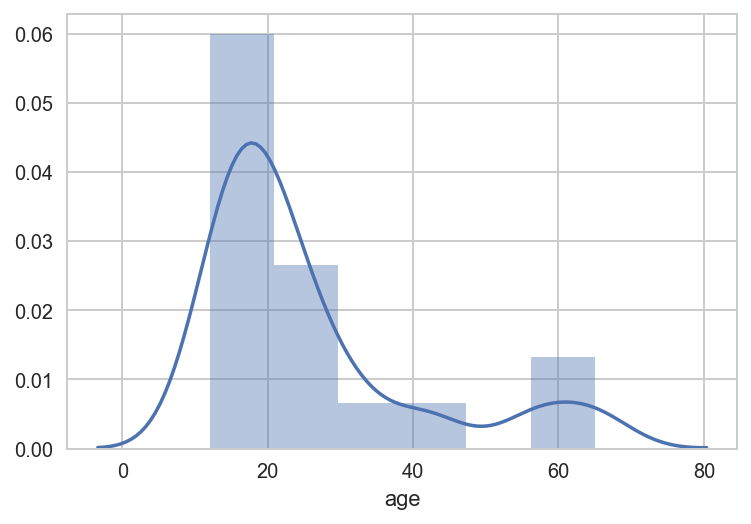

In [145]:
#Same thing happens for age

sns.distplot(drug.age, hist=True)
#sns.plt.title('Histogram of Age')

age percentiles
[ 12.4  16.   20.   27.5  61.8]


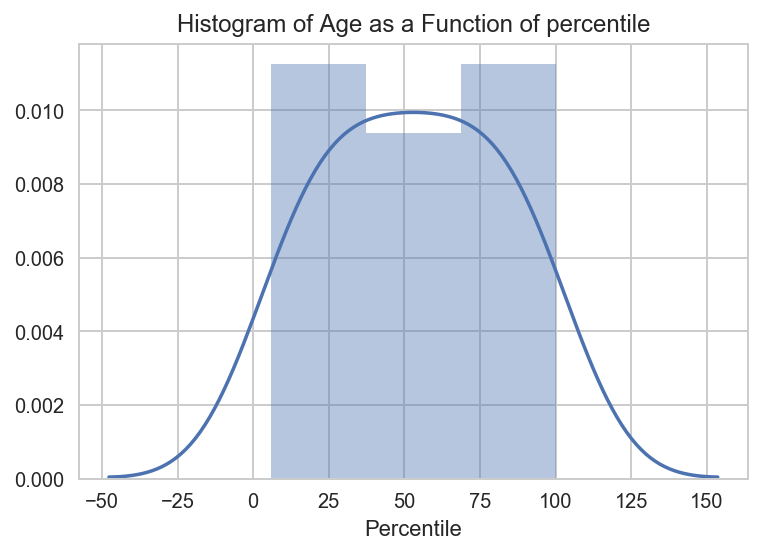

In [146]:

ptiles_age = np.percentile(drug.age, ptiles )
print 'age percentiles'
print ptiles_age
#print ptiles_age #Calculated percentile boundaries for age

#Calculate percentile for each value in age
#Credit reptilicus http://stackoverflow.com/questions/12414043/map-each-list-value-to-its-corresponding-percentile
drug.age_ptile = [stats.percentileofscore(drug.age, i) for i in drug.age]

sns.distplot(drug.age_ptile, hist=True)
sns.plt.title('Histogram of Age as a Function of percentile')
sns.plt.xlabel('Percentile')